# Here we compute the power spectrum noise biases to get an idea of how the code works

In [1]:
from imports import *
import scripts.normalization as n0
import scripts.N1L_bias as n1

In [2]:
# CMB ells
rlmin, rlmax = 2, 2000
rsample = 100 # or fully sampled: int(rlmax-rlmin+1)
l1 = np.linspace(rlmin, rlmax, rsample)

N_phi = 50 # vegas will take many more points
phi1 = np.linspace(0., 2*np.pi, N_phi) # angle between l1 and L

# Reconstruction Ls
Lmin, Lmax = 2, 2000
L = np.linspace(Lmin,Lmax+1,rsample) 

In [3]:
cls_path = './cls'
lclTT = np.loadtxt(f'{cls_path}/lensed_clTT_lmax8000.txt')
# camb ells
ell = np.arange(0,8000+1,1)

## Normalization

Test number of evaluations of the integrand in vegas.

In [4]:
AL1 = np.zeros(len(L))
AL2 = np.zeros(len(L))
AL3 = np.zeros(len(L))

In [5]:
for i in tqdm(range(len(L))):
    AL1[i] = n0.get_norm(L[i], l1, phi1, ell, lclTT, lclTT, rlmin, rlmax, nEval=1e2)

100%|██████████| 100/100 [00:06<00:00, 16.04it/s]


In [6]:
for i in tqdm(range(len(L))):
    AL2[i] = n0.get_norm(L[i], l1, phi1, ell, lclTT, lclTT, rlmin, rlmax, nEval=1e4)

  0%|          | 0/100 [00:00<?, ?it/s]/global/cscratch1/sd/akalaja/lensbispectrum_noisebiases/scripts/weight_functions.py:48: RuntimeWarning: divide by zero encountered in true_divide
  result = numerator/denominator
100%|██████████| 100/100 [00:18<00:00,  5.49it/s]


In [7]:
for i in tqdm(range(len(L))):
    AL3[i] = n0.get_norm(L[i], l1, phi1, ell, lclTT, lclTT, rlmin, rlmax, nEval=1e5)

100%|██████████| 100/100 [02:26<00:00,  1.46s/it]


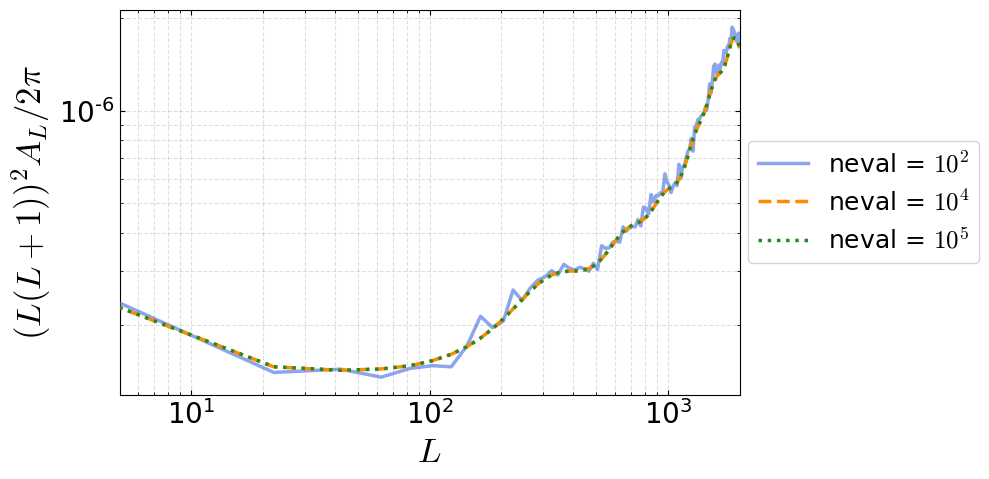

In [8]:
Lfactor = (L*(L+1))**2/2/np.pi
plt.figure(figsize=(8,5))
plt.loglog(L, Lfactor*AL1, label = 'neval = $10^2$', color = 'royalblue', linewidth = 2.5, zorder = 10, alpha = 0.6)
plt.loglog(L, Lfactor*AL2, label = 'neval = $10^4$', color = 'darkorange', linewidth = 2.5, linestyle = "--", zorder = 15)
plt.loglog(L, Lfactor*AL3, label = 'neval = $10^5$', color = 'forestgreen', linewidth = 2.5, linestyle = ":", zorder = 20)

plt.xlabel(r'$L$', fontsize=25)
plt.ylabel(r'$(L(L+1))^2A_L/2\pi$', fontsize=25)
plt.legend(bbox_to_anchor=(1.2, 0.5), loc='center', ncol = 1, borderaxespad=0., fontsize=18)#(loc='best', fontsize=20)


plt.tick_params(axis='both', which='both', direction='in', top=True, right=True, labelsize=20)
plt.grid(True, which='both',linestyle='--', alpha = 0.4)

plt.xlim([5,2000])
# plt.ylim([1e-13,7e1])

# ax1.set_ylim([1.4e-6,6.2e-6])

plt.show()

## Power spectrum: N1 

In [9]:
clpp = np.loadtxt(f'{cls_path}/clpp_lmax8000.txt')

In [10]:
N1L = np.zeros(len(L))

In [15]:
for i in tqdm(range(len(L))):
    N1L[i] = n1.get_N1(L[i], l1, l1, phi1, phi1, ell, lclTT, lclTT, clpp, rlmin, rlmax, 1e5)

  0%|          | 0/100 [00:00<?, ?it/s]/global/cscratch1/sd/akalaja/lensbispectrum_noisebiases/scripts/weight_functions.py:191: RuntimeWarning: divide by zero encountered in true_divide
  result = numerator/denominator
/global/cscratch1/sd/akalaja/lensbispectrum_noisebiases/scripts/weight_functions.py:48: RuntimeWarning: divide by zero encountered in true_divide
  result = numerator/denominator
100%|██████████| 100/100 [03:31<00:00,  2.12s/it]


In [16]:
N1L_norm = N1L*AL3**2

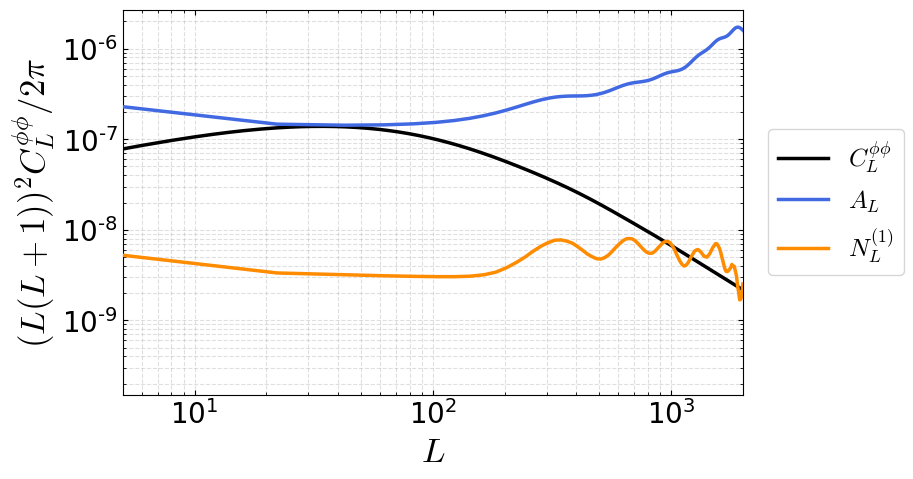

In [17]:
plt.figure(figsize=(8,5))
plt.loglog(ell, (ell*(ell+1))**2*clpp/2/np.pi, label = '$C_L^{\phi\phi}$', color = 'black', linewidth = 2.5, zorder = 10)
plt.loglog(L, (L*(L+1))**2*AL3/2/np.pi, label = '$A_L$', color = 'royalblue', linewidth = 2.5, zorder = 10)
plt.loglog(L, (L*(L+1))**2*N1L_norm/2/np.pi, label = '$N^{(1)}_L$', color = 'darkorange', linewidth = 2.5, zorder = 10)


plt.xlabel(r'$L$', fontsize=25)
plt.ylabel(r'$(L(L+1))^2C_L^{\phi\phi}/2\pi$', fontsize=25)
plt.legend(bbox_to_anchor=(1.15, 0.5), loc='center', ncol = 1, borderaxespad=0., fontsize=18)#(loc='best', fontsize=20)


plt.tick_params(axis='both', which='both', direction='in', top=True, right=True, labelsize=20)
plt.grid(True, which='both',linestyle='--', alpha = 0.4)

plt.xlim([5,2000])
# plt.ylim([1e-13,7e1])

# ax1.set_ylim([1.4e-6,6.2e-6])

plt.show()

# Bispectrum: N0 and N1

To get N0 and N1, go to ./jobs/ and run 

In [27]:
# ! sbatch n0B_job.sh 

or

In [26]:
# ! sbatch n1B_job.sh

Tested on NERSC and Flatiron Institute.

In [38]:
# Upload files
_, n0_equil = np.loadtxt('./output/N0equil_rlmax2000Lmax2000_gCl_lCl_lCl.txt', unpack = True)
_, n1sep_equil = np.loadtxt('./output/sepN1equil_rlmax2000Lmax2000_gCl_lCl_lCl.txt', unpack = True)
_, n1cpl_equil = np.loadtxt('./output/coupN1equil_rlmax2000Lmax2000_gCl_lCl_lCl.txt', unpack = True)

In [39]:
# convert to kappa
kfactor = L**2/2

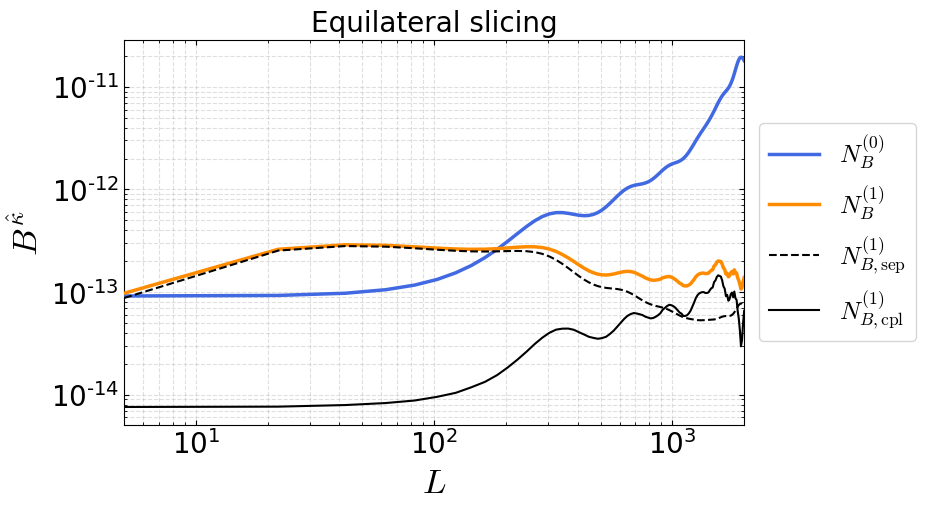

In [42]:
plt.figure(figsize=(8,5))
plt.loglog(L, kfactor**3*n0_equil, label = '$N^{(0)}_B$', color = 'royalblue', linewidth = 2.5, zorder = 10)
plt.loglog(L, kfactor**3*(n1sep_equil+n1cpl_equil), label = '$N^{(1)}_B$', color = 'darkorange', linewidth = 2.5, zorder = 10)
plt.loglog(L, kfactor**3*n1sep_equil, label = '$N^{(1)}_{B,\mathrm{sep}}$', color = 'black', linewidth = 1.5, linestyle = '--', zorder = 10)
plt.loglog(L, kfactor**3*n1cpl_equil, label = '$N^{(1)}_{B,\mathrm{cpl}}$', color = 'black', linewidth = 1.5, linestyle = '-', zorder = 10)


plt.xlabel(r'$L$', fontsize=25)
plt.ylabel(r'$B^{\hat{\kappa}}$', fontsize=25)
plt.legend(bbox_to_anchor=(1.15, 0.5), loc='center', ncol = 1, borderaxespad=0., fontsize=18)#(loc='best', fontsize=20)

plt.title('Equilateral slicing', fontsize=20)

plt.tick_params(axis='both', which='both', direction='in', top=True, right=True, labelsize=20)
plt.grid(True, which='both',linestyle='--', alpha = 0.4)

plt.xlim([5,2000])
# plt.ylim([1e-13,7e1])

# ax1.set_ylim([1.4e-6,6.2e-6])

plt.show()